<a href="https://colab.research.google.com/github/Heulwen31/Land-cover-mapping-sentinel-2-unsupervised/blob/main/LULC_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install earthpy gdal

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 1.0 MB 33.4 MB/s 
     |████████████████████████████████| 19.3 MB 10.9 MB/s 
     |████████████████████████████████| 16.7 MB 301 kB/s 
     |████████████████████████████████| 6.3 MB 25.4 MB/s 


In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/AI/*HCM?*.tif")
S_sentinel_bands.sort()
S_sentinel_bands

['/content/drive/MyDrive/AI/HCM_B1_B2_B3.tif',
 '/content/drive/MyDrive/AI/HCM_B4_B5_B6.tif',
 '/content/drive/MyDrive/AI/HCM_B7_B8_B8A.tif',
 '/content/drive/MyDrive/AI/HCM_B9_B11_B12.tif']

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
    l.append(f.read(2))
    l.append(f.read(3))

In [ ]:
arr_st = np.stack(l)
arr_st[np.isnan(arr_st)] = 0

In [ ]:
for i in range(0, 3):
  print(l[i][748][622])

0.15475926
0.13536297
0.15128519


In [ ]:
print(arr_st)
print(arr_st.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(12, 1496,

In [ ]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 1496
Width: 1245
Bands: 12


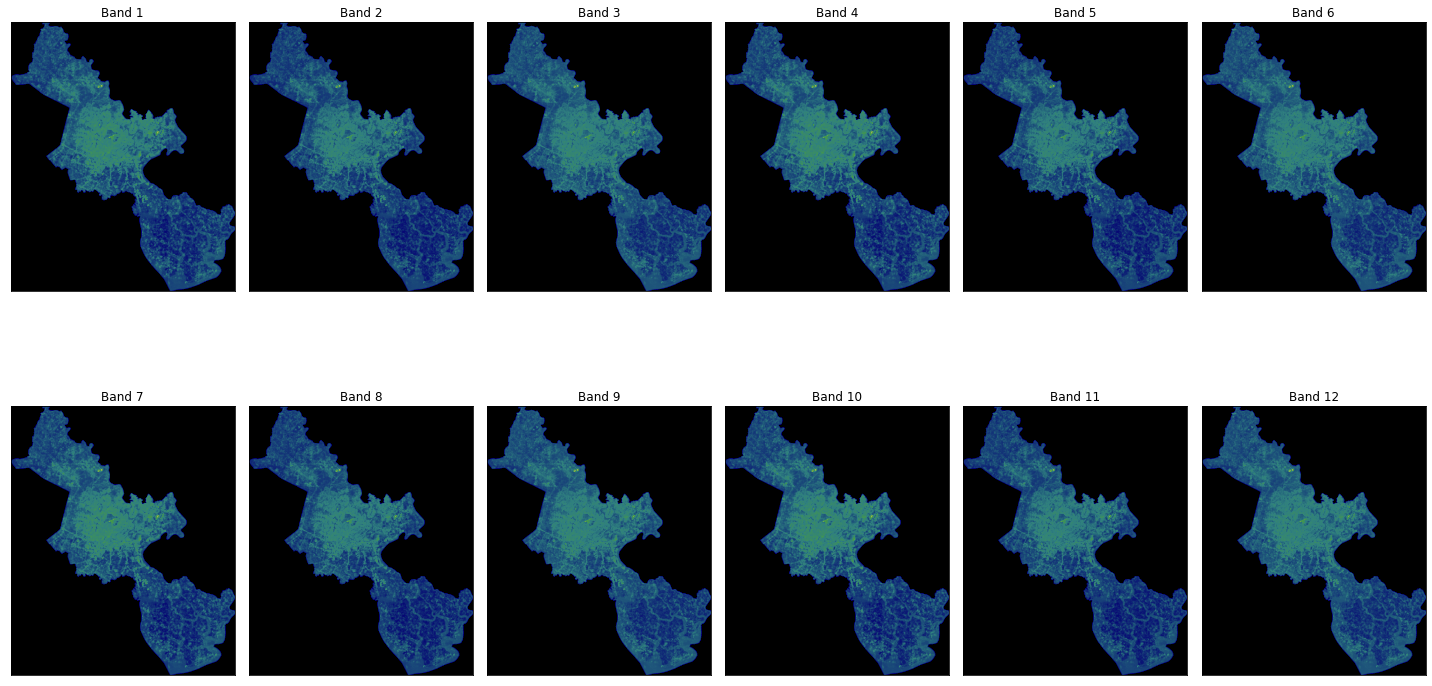

In [ ]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

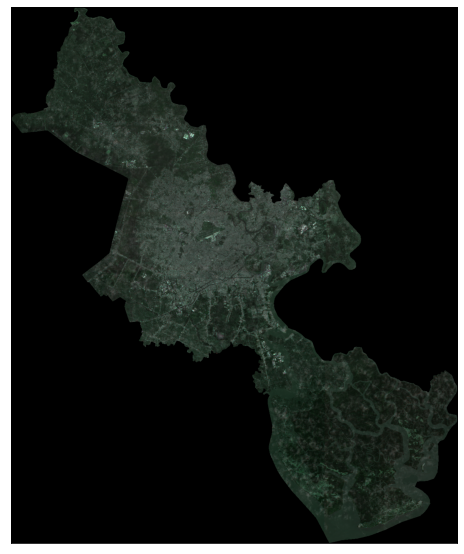

In [ ]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8, 10), 
                  # title='RGB Composite Image'
                  )

plt.show()

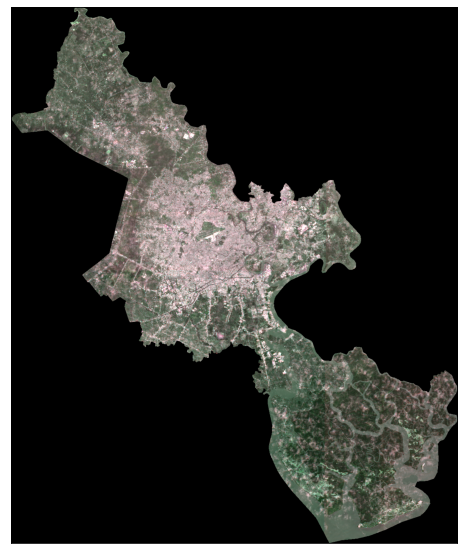

In [ ]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

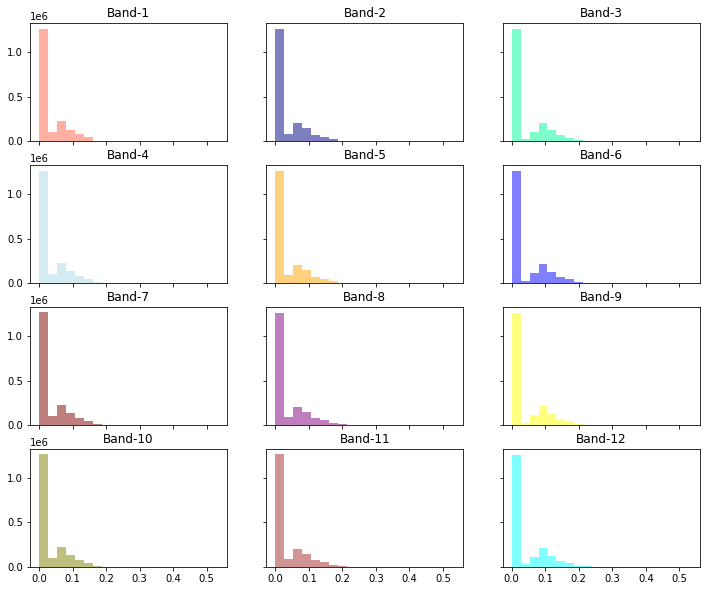

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [ ]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(1496, 1245, 12)

In [ ]:
x.reshape(-1, 12).shape, 1496*1245

((1862520, 12), 1862520)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(1862520, 12)

In [ ]:
pca = PCA(n_components = 4)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [ ]:
data.shape

(1862520, 4)

In [ ]:
pca.explained_variance_ratio_

array([9.92542958e-01, 5.94717573e-03, 1.51166241e-03, 1.32496843e-26])

In [ ]:
np.sum(pca.explained_variance_ratio_)

1.0000017966287256

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, random_state = 11)

kmeans.fit(data)

KMeans(n_clusters=6, random_state=11)

In [ ]:
labels = kmeans.predict(data)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

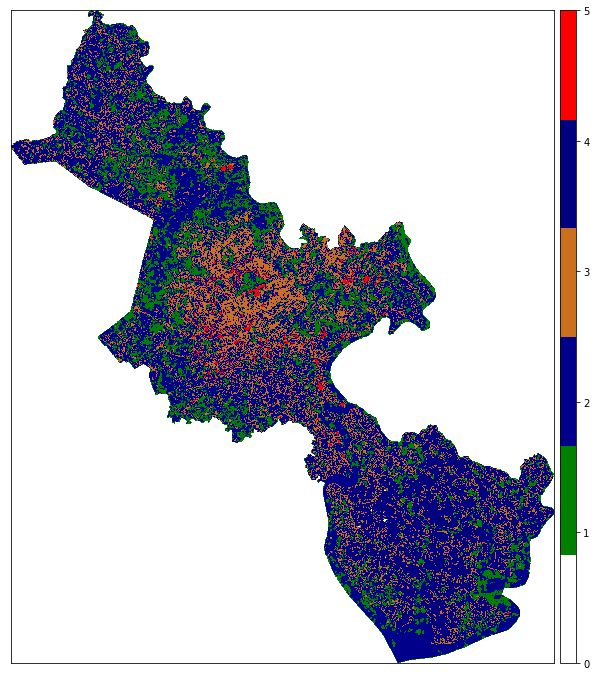

In [ ]:
ep.plot_bands(labels.reshape(1496, 1245), cmap=ListedColormap(['white', 'green', 'darkblue', '#CA6F1E', 'navy', 'red']))
plt.show()